In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("1000_Companies.csv")
data=data.drop("Unnamed: 5", axis=1)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

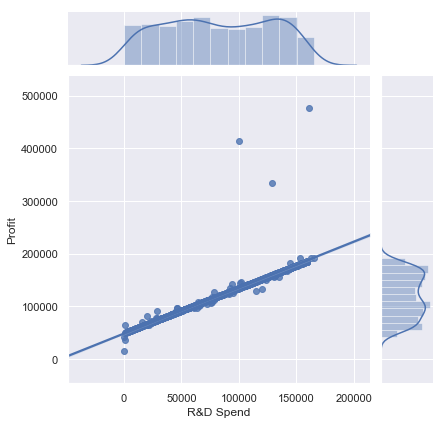

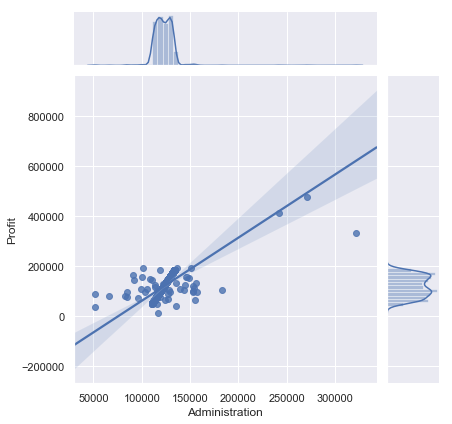

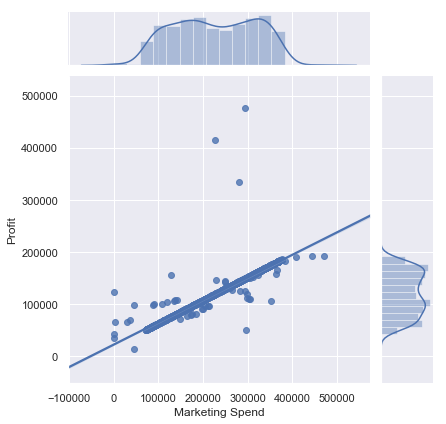

In [4]:
sns.jointplot(data["R&D Spend"],data["Profit"], kind="reg")
sns.jointplot(data["Administration"],data["Profit"], kind="reg")
sns.jointplot(data["Marketing Spend"],data["Profit"], kind="reg")

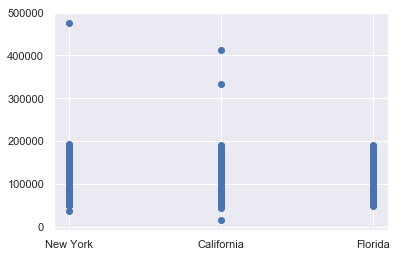

In [5]:
plt.scatter(data["State"],data["Profit"])

In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


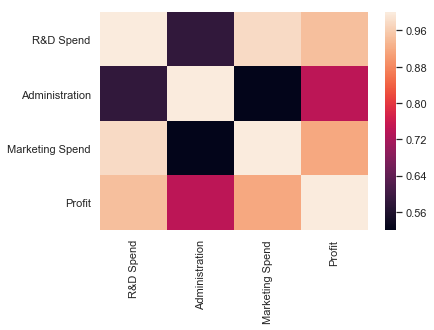

In [7]:
sns.heatmap(data.corr())

In [8]:
print(data.State.isin(["New York"]).sum())
print(data.State.isin(["California"]).sum())
print(data.State.isin(["Florida"]).sum())

334
344
322


In [9]:
data[data.Profit>200000]

,R&D Spend,Administration,Marketing Spend,State,Profit
997,100275.47,241926.31,227142.82,California,413956.48
998,128456.23,321652.14,281692.32,California,333962.19
999,161181.72,270939.86,295442.17,New York,476485.43


In [10]:
data[data.Profit<25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [11]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [12]:
data=data.drop(index=[49,997,998,999])

In [13]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
992,105127.0,125982.7298,271621.8728,Florida,138841.98810
993,46798.0,117368.4374,159075.9080,California,89012.02672
994,97209.0,124813.3635,256344.0701,New York,132077.70900
995,54135.0,118451.9990,173232.6695,California,95279.96251
996,134970.0,130390.0800,329204.0228,California,164336.60550


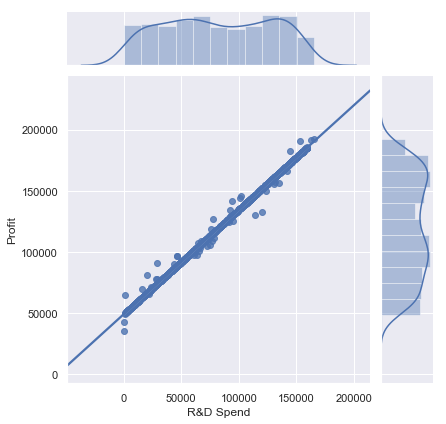

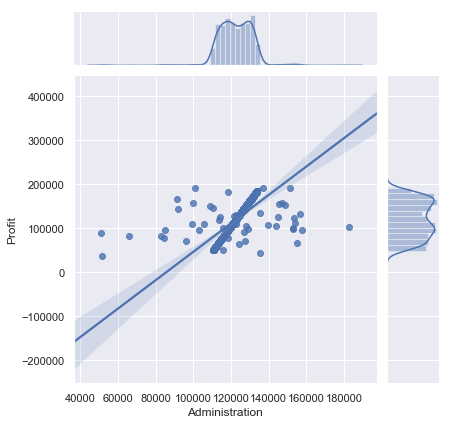

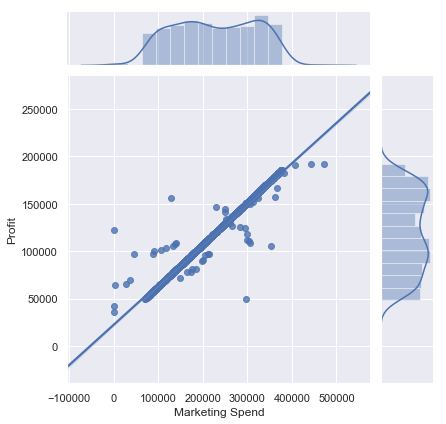

In [14]:
sns.jointplot(data["R&D Spend"],data["Profit"], kind="reg")
sns.jointplot(data["Administration"],data["Profit"], kind="reg")
sns.jointplot(data["Marketing Spend"],data["Profit"], kind="reg")

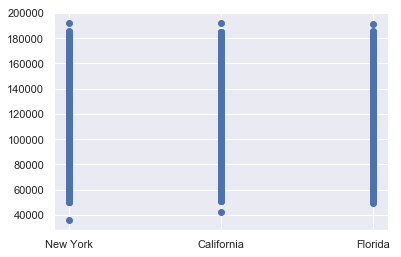

In [15]:
plt.scatter(data["State"],data["Profit"])

In [16]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.751763,0.978917,0.999019
Administration,0.751763,1.000000,0.694289,0.746332
Marketing Spend,0.978917,0.694289,1.000000,0.980615
Profit,0.999019,0.746332,0.980615,1.000000


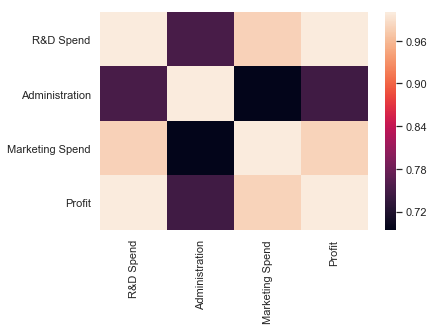

In [17]:
sns.heatmap(data.corr())

In [18]:
for i,j in enumerate(data.State.unique()):
    data.State.mask(data.State==j, other=i, inplace=True)

In [19]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [20]:
x=data.drop(columns="Profit", axis=1)
y=data.Profit

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
linreg.score(x_test, y_test)

0.9994172489849392

In [24]:
a=np.array(y_test)
a=pd.DataFrame(a, columns=["Orignal"])

In [25]:
y=pd.DataFrame(linreg.predict(x_test), columns=["Predicted"])

In [26]:
ans=pd.concat([a,y], axis=1)

In [27]:
ans["Diffrence"]=ans["Orignal"]-ans["Predicted"]

In [28]:
ans["% Diffrence"]=100*np.absolute(ans["Diffrence"])/ans["Orignal"]

In [29]:
ans.head()

,Orignal,Predicted,Diffrence,% Diffrence
0,177000.62080,176857.581456,143.039344,0.080813
1,110395.79400,110466.501788,-70.707788,0.064049
2,164139.26420,164031.626949,107.637251,0.065577
3,116205.82960,116230.133657,-24.304057,0.020915
4,68648.28331,68773.082821,-124.799511,0.181796


In [30]:
ans[ans["% Diffrence"]>=1]

,Orignal,Predicted,Diffrence,% Diffrence
49,146121.95,135200.725254,10921.224746,7.474048
72,81005.76,83323.998433,-2318.238433,2.861819
130,107404.34,102594.618998,4809.721002,4.478144
187,101004.64,102385.912730,-1381.272730,1.367534
243,191050.39,181463.553192,9586.836808,5.017962


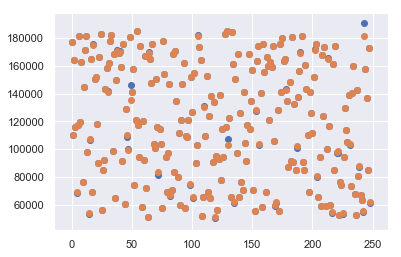

In [31]:
plt.scatter(range(249),ans["Orignal"])
plt.scatter(range(249),ans["Predicted"])

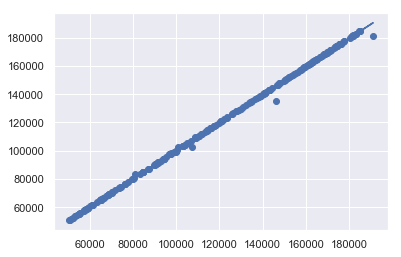

In [32]:
m, b = np.polyfit(ans["Orignal"],ans["Predicted"], 1)
plt.scatter(ans["Orignal"],ans["Predicted"])
plt.plot(ans["Orignal"],m*ans["Orignal"] + b)

In [33]:
linreg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

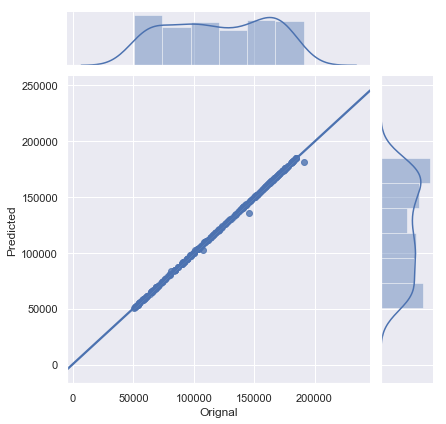

In [34]:
sns.jointplot(ans["Orignal"], ans["Predicted"], kind="reg")

In [35]:
linreg.coef_

array([ 8.00539676e-01, -1.08037348e-02,  2.74660008e-02, -3.04110811e+01])

In [36]:
linreg.intercept_

48576.778004389096

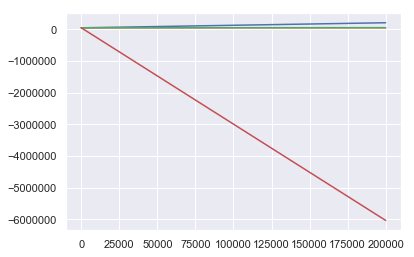

In [37]:
for i in linreg.coef_:
    plt.plot(range(200000),i*range(200000)+linreg.intercept_)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,linreg.predict(x_test))

0.9994172489849392

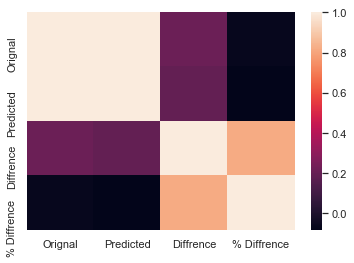

In [40]:
sns.heatmap(ans.corr())